In [1]:
import os.path
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
os.path.abspath(".")

'C:\\STUFF\\Projects\\Xiaoxia\\xcj_hypothesis_test\\source_code\\python'

## W

In [3]:
MIN_TWEETS = 10
FREQUENCY = '1D'

In [4]:
wdf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../data/data_for_w/*.csv*")])
wdf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
wdf.drop_duplicates("Url", inplace=True)
# wdf.drop(columns=["Url"], inplace=True)
wdf["Title"] = wdf["Title"].apply(lambda x: x.lower())
wdf 

,Date,Title,Url,Sentiment,Author
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts
...,...,...,...,...,...
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks
85465,2023-08-20 04:00:15,rt @justfreshkicks ad: nike air max 1 prm 'cre...,http://twitter.com/iyhke/statuses/169311067307...,neutral,iyhke


In [5]:
wdf["Author"].nunique()

568

In [6]:
wdf["Date"].min(), wdf["Date"].max(), wdf["Date"].max() - wdf["Date"].min()

(Timestamp('2023-06-01 04:00:01'),
 Timestamp('2023-09-24 03:54:56'),
 Timedelta('114 days 23:54:55'))

In [7]:
wdf["mcdonalds"] = wdf["Title"].apply(lambda x: "mcdonald" in x)
wdf["starbucks"] = wdf["Title"].apply(lambda x: "starbuck" in x)
wdf["nike"] = wdf["Title"].apply(lambda x: "nike" in x)
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
...,...,...,...,...,...,...,...,...
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True
85465,2023-08-20 04:00:15,rt @justfreshkicks ad: nike air max 1 prm 'cre...,http://twitter.com/iyhke/statuses/169311067307...,neutral,iyhke,False,False,True


In [8]:
wdf.drop(wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]].index, inplace=True)
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True


In [9]:
author_mcd = wdf[["Author", "mcdonalds"]].groupby("Author").apply(lambda gwdf: gwdf["mcdonalds"].sum()).rename("mcdonalds_count").reset_index()
author_stb = wdf[["Author", "starbucks"]].groupby("Author").apply(lambda gwdf: gwdf["starbucks"].sum()).rename("starbucks_count").reset_index()
author_nke = wdf[["Author", "nike"]].groupby("Author").apply(lambda gwdf: gwdf["nike"].sum()).rename("nike_count").reset_index()

In [10]:
author_brand = author_mcd.merge(author_stb, how="outer", on="Author", validate="one_to_one").merge(author_nke, how="outer", on="Author", validate="one_to_one").set_index("Author")
author_brand["counts_sum"] = author_brand.sum(axis=1)
author_brand["max_type"] = author_brand[["mcdonalds_count","starbucks_count","nike_count"]].idxmax(axis=1).apply(lambda x: x[:-6])
# author_brand["mcdonalds_count"] /= author_brand["counts_sum"]
# author_brand["starbucks_count"] /= author_brand["counts_sum"]
# author_brand["nike_count"] /= author_brand["counts_sum"]
author_brand = author_brand[author_brand["counts_sum"] > MIN_TWEETS]
author_brand

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
0d7aw,0,0,27,27,nike
100Ebay,0,1,307,308,nike
1560gl,0,100,0,100,starbucks
19Edwin2,0,0,104,104,nike
1Mauricewood,3,2,259,264,nike
...,...,...,...,...,...
xalilulah,0,0,98,98,nike
xx_somm,0,0,114,114,nike
y0_stephhh,0,1,144,145,nike


In [11]:
author_brand[(author_brand["nike_count"] != 0) & (author_brand["starbucks_count"] == author_brand["nike_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,


In [12]:
author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["nike_count"] == author_brand["mcdonalds_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,


In [13]:
author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["starbucks_count"] == author_brand["mcdonalds_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
AllDayBuckets23,1,1,1264,1266,nike
CBSNews,11,11,1,23,mcdonalds
CarlBancoro,1,1,83,85,nike
D_defiler,1,1,91,93,nike
Miketracy8,2,2,797,801,nike
NacnudKevin,1,1,295,297,nike
ScottyDeals,1,1,928,930,nike
ShaunRajah3,2,2,1339,1343,nike
SherylW87045,1,1,2381,2383,nike


In [14]:
wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]]

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike


In [15]:
author_to_brand = author_brand['max_type'].to_dict()

In [16]:
# drop tweets by all other users
wdf.drop(wdf[~wdf["Author"].isin(author_to_brand)].index, inplace=True)

In [17]:
wdf["AuthorBrand"] = wdf["Author"].apply(lambda x: author_to_brand[x])
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True,nike
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True,nike
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike
...,...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True,nike
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True,nike
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True,nike


In [18]:
# remove tweets in which Authors talk about other brands than the one they mostly talk about
wdf.drop(wdf[wdf[['mcdonalds', 'starbucks','nike', 'AuthorBrand']].apply(lambda row: not row[row["AuthorBrand"]], axis=1)].index, inplace=True)

In [19]:
# assign a number to each sentiment for easy processing. Numbers as as given in the dictionary below.
sentiment_to_number = {"none": 1, "positive": 2, "neutral": 3, "negative": 4}
wdf["SentimentNo"] = wdf["Sentiment"].apply(lambda x: sentiment_to_number[x])
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand,SentimentNo
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True,nike,3
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True,nike,3
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike,3
...,...,...,...,...,...,...,...,...,...,...
85461,2023-08-20 04:04:37,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HypeDropsApp/statuses/16931...,neutral,HypeDropsApp,False,False,True,nike,3
85462,2023-08-20 04:02:47,nike sb dunk low aqua noise orange emerald ris...,http://twitter.com/djdelz/statuses/16931113090...,neutral,djdelz,False,False,True,nike,3
85463,2023-08-20 04:01:50,@fityeth @undefeatedinc @nike blue,http://twitter.com/franalations23/statuses/169...,neutral,franalations23,False,False,True,nike,3
85464,2023-08-20 04:01:21,new sizes added ⚡: nike waffle one se - phanto...,http://twitter.com/HDRestocks/statuses/1693110...,neutral,HDRestocks,False,False,True,nike,3


### Sentiment Mixture Type calculation of W

In [20]:
# calculate how many types of sentiments they have produced in each timestep

def num_sentiments_to_symbol(num_sentiment_types):
    # No sentiments         -> 0
    # consistent sentiments -> 1
    # mixted sentiments     -> 2
    if num_sentiment_types > 1:
        return 2
    return num_sentiment_types

author_sentiment_mix_on_timestep = wdf[["Date", "Author", "SentimentNo"]].set_index("Date").groupby([pd.Grouper(freq=FREQUENCY), 'Author']).apply(
    lambda sentiments: num_sentiments_to_symbol(sentiments["SentimentNo"].nunique())
).rename("SentimentMixType").reset_index()
author_sentiment_mix_on_timestep

,Date,Author,SentimentMixType
0,2023-06-01,0d7aw,1
1,2023-06-01,100Ebay,1
2,2023-06-01,1560gl,1
3,2023-06-01,19Edwin2,1
4,2023-06-01,1Mauricewood,1
...,...,...,...
32224,2023-09-24,sucio619,1
32225,2023-09-24,supremeelmz,1
32226,2023-09-24,swooshsupply,1
32227,2023-09-24,thediary_myfav,1


In [21]:
author_date_sentiment_matrix = author_sentiment_mix_on_timestep.pivot_table(index="Author", columns="Date", values="SentimentMixType", fill_value=0)
author_date_sentiment_matrix.to_csv("W_sentiment_mix_type_matrix_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))
author_date_sentiment_matrix

Date,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,...,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23,2023-09-24
Author,,,,,,,,,,,,,,,,,,,,,
0d7aw,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100Ebay,1,0,1,1,0,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,0
1560gl,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,0
19Edwin2,1,1,1,0,0,1,1,1,0,1,...,0,1,1,0,1,1,1,1,0,0
1Mauricewood,1,1,1,1,1,1,0,1,1,1,...,0,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xalilulah,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,0
xx_somm,1,1,1,0,1,1,0,1,1,0,...,0,1,0,1,1,0,1,0,0,0
y0_stephhh,1,1,2,1,0,1,2,0,1,1,...,0,0,1,0,0,0,0,1,1,0


In [50]:
total_value_counts = author_date_sentiment_matrix.apply(lambda row: row.value_counts(), axis=1).fillna(0).sum(axis=0)
total_value_counts

0    31107.0
1    27248.0
2     4981.0
dtype: float64

In [53]:
total_value_counts.sum()

63336.0

In [55]:
total_value_counts * 100 / total_value_counts.sum()

0    49.114248
1    43.021346
2     7.864406
dtype: float64

### Mode Sentiment based calculation of W

In [22]:
# find the author's most prominent sentiment at the timestep by using statistical mode
def get_avg_sentiment(df):
    # print(df.head(), df["SentimentNo"].mode().sort_values().iloc[0])
    return df["SentimentNo"].mode().sort_values().iloc[0]
    
author_mode_sentiment_on_timestep = wdf[["Date", "Author", "SentimentNo"]].set_index("Date").groupby([pd.Grouper(freq=FREQUENCY), 'Author']).apply(lambda tdf: get_avg_sentiment(tdf)).rename("ModeSentiment").reset_index()
author_mode_sentiment_on_timestep

,Date,Author,ModeSentiment
0,2023-06-01,0d7aw,2
1,2023-06-01,100Ebay,3
2,2023-06-01,1560gl,3
3,2023-06-01,19Edwin2,3
4,2023-06-01,1Mauricewood,3
...,...,...,...
32224,2023-09-24,sucio619,3
32225,2023-09-24,supremeelmz,3
32226,2023-09-24,swooshsupply,3
32227,2023-09-24,thediary_myfav,3


In [23]:
author_date_mode_sentiment_matrix = author_mode_sentiment_on_timestep.pivot(index="Author", columns="Date", values="ModeSentiment").fillna(1)
author_date_mode_sentiment_matrix.to_csv("W_mode_sentiment_matrix_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))
author_date_mode_sentiment_matrix

Date,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,...,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23,2023-09-24
Author,,,,,,,,,,,,,,,,,,,,,
0d7aw,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100Ebay,3.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
1560gl,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0
19Edwin2,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,...,1.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0
1Mauricewood,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xalilulah,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0
xx_somm,3.0,3.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,1.0,...,1.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0
y0_stephhh,3.0,3.0,2.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0


## Y

In [24]:
before_event_datetime = datetime.datetime(2023, 10, 8, 4)
print(before_event_datetime)
before_start = before_event_datetime - datetime.timedelta(days=14)
print(before_start)
after_end = before_event_datetime + datetime.timedelta(days=14)
print(after_end)

2023-10-08 04:00:00
2023-09-24 04:00:00
2023-10-22 04:00:00


In [25]:
ydf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("../../data/data_for_y/*.csv*")]).sort_values("Date")
ydf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
ydf.drop_duplicates("Url", inplace=True)
# ydf.drop(columns=["Url"], inplace=True)
ydf["Title"] = ydf["Title"].apply(lambda x: x.lower())
ydf 

,Date,Title,Url,Sentiment,Author
98506,2023-09-24 04:00:00,ad: nike air force 1 '07 lv8 'enamel green' fo...,http://twitter.com/SneakerDropWW/statuses/1705...,neutral,SneakerDropWW
98505,2023-09-24 04:01:02,"i staying outside starbucks 8:49 pm until now,...",http://twitter.com/lucy_naomi27/statuses/17057...,negative,lucy_naomi27
98504,2023-09-24 04:04:57,nike af1 x terror squad https://t.co/8i4vglfts...,http://twitter.com/bak2nyc/statuses/1705795430...,neutral,bak2nyc
98503,2023-09-24 04:05:11,nike air force 1 se 'baroque brown' \n\navaila...,http://twitter.com/SneakerScouts/statuses/1705...,neutral,SneakerScouts
98502,2023-09-24 04:08:41,ran 3.22 kilometres with nike⁠ run club \nday3...,http://twitter.com/harminderharry/statuses/170...,neutral,harminderharry
...,...,...,...,...,...
4,2023-10-28 03:56:54,nike air force 1 high vlone black university g...,http://twitter.com/mountainshirt/statuses/1718...,neutral,mountainshirt
3,2023-10-28 03:57:00,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17181...,negative,EarthDesires
2,2023-10-28 03:57:02,nike air foamposite one tianjin\n💰 buy now : h...,http://twitter.com/mountainshirt/statuses/1718...,neutral,mountainshirt
1,2023-10-28 03:57:29,rt @justfreshkicks official look at a new nike...,http://twitter.com/sunatlaserbeam/statuses/171...,neutral,sunatlaserbeam


In [26]:
# use the same users as W
ydf.drop(ydf[~ydf["Author"].isin(author_to_brand)].index, inplace=True)
ydf.shape

(89543, 5)

In [27]:
bef_ydf = ydf[(before_start <= ydf["Date"]) & (ydf["Date"] > before_event_datetime)]
bef_ydf

,Date,Title,Url,Sentiment,Author
62650,2023-10-08 04:00:01,ad: nike sale event🚨\n\nextra 20% off select s...,http://twitter.com/SOLELINKS/statuses/17108676...,neutral,SOLELINKS
62652,2023-10-08 04:00:01,🛍️ ultimate sale on #nike us\n📉 up to 60% off ...,http://twitter.com/swooshsupply/statuses/17108...,neutral,swooshsupply
62651,2023-10-08 04:00:01,ad: extra 20% off thousands of styles during n...,http://twitter.com/SneakerDropWW/statuses/1710...,neutral,SneakerDropWW
62649,2023-10-08 04:00:09,@nike the lawsuit against nike and jordan br...,http://twitter.com/basil067/statuses/171086765...,neutral,basil067
62648,2023-10-08 04:00:45,nike us: 20% off select styles with code ultim...,http://twitter.com/BallinSneaks/statuses/17108...,neutral,BallinSneaks
...,...,...,...,...,...
15,2023-10-28 03:55:48,@kupcakeprose (note: i would technically not a...,http://twitter.com/AceOnFire77/statuses/171811...,neutral,AceOnFire77
9,2023-10-28 03:56:36,rt @thereal_jmillz_ what it do friends & fam! ...,http://twitter.com/Dan_in_SD/statuses/17181145...,neutral,Dan_in_SD
7,2023-10-28 03:56:37,@abuamiraah @nike i see you playa,http://twitter.com/iceberg562/statuses/1718114...,neutral,iceberg562
3,2023-10-28 03:57:00,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17181...,negative,EarthDesires


In [28]:
aft_ydf = ydf[(before_event_datetime <= ydf["Date"]) & (ydf["Date"] < after_end)]
aft_ydf

,Date,Title,Url,Sentiment,Author
62653,2023-10-08 04:00:00,the mcrib is making its triumphant return near...,http://twitter.com/CBSNews/statuses/1710867616...,neutral,CBSNews
62650,2023-10-08 04:00:01,ad: nike sale event🚨\n\nextra 20% off select s...,http://twitter.com/SOLELINKS/statuses/17108676...,neutral,SOLELINKS
62652,2023-10-08 04:00:01,🛍️ ultimate sale on #nike us\n📉 up to 60% off ...,http://twitter.com/swooshsupply/statuses/17108...,neutral,swooshsupply
62651,2023-10-08 04:00:01,ad: extra 20% off thousands of styles during n...,http://twitter.com/SneakerDropWW/statuses/1710...,neutral,SneakerDropWW
62649,2023-10-08 04:00:09,@nike the lawsuit against nike and jordan br...,http://twitter.com/basil067/statuses/171086765...,neutral,basil067
...,...,...,...,...,...
18772,2023-10-22 03:41:38,nike ja 1 “backyard bbq” coming later this yea...,http://twitter.com/JaunNews/statuses/171593642...,neutral,JaunNews
18771,2023-10-22 03:42:36,rt @kicksdeals ⛳️ you can save $85 on the whit...,http://twitter.com/eaalva23/statuses/171593666...,neutral,eaalva23
18770,2023-10-22 03:45:03,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17159...,negative,EarthDesires
18768,2023-10-22 03:49:27,rt @thesitesupply first look at the di'orr gre...,http://twitter.com/masterchefian/statuses/1715...,neutral,masterchefian


### Sentiment Mixture Type calculations

In [29]:
def get_author_sampled_sentiment_mix_type(datadf, frequency):
    return datadf[["Date", "Author", "Sentiment"]].set_index("Date").groupby([pd.Grouper(freq=frequency), "Author"]).apply(
        lambda time_author_sentiment: num_sentiments_to_symbol(time_author_sentiment["Sentiment"].nunique())
    ).rename("SentimentMixType").reset_index().pivot_table(index="Author", columns="Date", values="SentimentMixType", fill_value=0).apply(
        lambda author_smt: author_smt.value_counts() ,axis=1
    ).fillna(0)

In [30]:
print("All Authors Count in Y:", len(ydf["Author"].unique()))
print("Before dataset Authors count: ", bef_ydf["Author"].nunique())
print("After dataset Authors count: ", aft_ydf["Author"].nunique())

aft_and_bef_all_authors = list(set().union(bef_ydf["Author"].unique(), aft_ydf["Author"].unique()))
aft_and_bef_all_authors.sort()

print("Combined After and Before datasets Authors count: ", len(aft_and_bef_all_authors) )
print("Missing Authors in After and Before sets: ", set(ydf["Author"].unique()).difference(aft_and_bef_all_authors) )

All Authors Count in Y: 542
Before dataset Authors count:  529
After dataset Authors count:  526
Combined After and Before datasets Authors count:  529
Missing Authors in After and Before sets:  {'Tee_Island01', 'nytimes', 'kissanimemob', 'sigmamale2053', 'TheLeadershipQB', 'NBCNews', 'CTVNews', 'rmjbio', 'The_Rishabh', 'zackgoering', 'CNN', 'halbailey97', 'NFTaylorr'}


In [31]:
author_before_smt = get_author_sampled_sentiment_mix_type(bef_ydf, "1D")
author_before_smt

,0,1,2
Author,,,
0d7aw,11.0,7.0,3.0
100Ebay,4.0,17.0,0.0
1560gl,1.0,20.0,0.0
19Edwin2,5.0,16.0,0.0
1Mauricewood,15.0,6.0,0.0
...,...,...,...
xXcvchikXx,2.0,0.0,19.0
xalilulah,12.0,9.0,0.0
xx_somm,10.0,10.0,1.0


In [32]:
author_after_smt = get_author_sampled_sentiment_mix_type(aft_ydf, "1D")
author_after_smt

,0,1,2
Author,,,
0d7aw,7.0,6.0,2.0
100Ebay,3.0,12.0,0.0
1560gl,1.0,14.0,0.0
19Edwin2,2.0,13.0,0.0
1Mauricewood,14.0,1.0,0.0
...,...,...,...
xXcvchikXx,1.0,1.0,13.0
xalilulah,9.0,6.0,0.0
xx_somm,7.0,7.0,1.0


In [33]:
before_and_after_author_smt = author_before_smt.join(author_after_smt, how="outer", lsuffix="_before", rsuffix="_after")
before_and_after_author_smt

,0_before,1_before,2_before,0_after,1_after,2_after
Author,,,,,,
0d7aw,11.0,7.0,3.0,7.0,6.0,2.0
100Ebay,4.0,17.0,0.0,3.0,12.0,0.0
1560gl,1.0,20.0,0.0,1.0,14.0,0.0
19Edwin2,5.0,16.0,0.0,2.0,13.0,0.0
1Mauricewood,15.0,6.0,0.0,14.0,1.0,0.0
...,...,...,...,...,...,...
xXcvchikXx,2.0,0.0,19.0,1.0,1.0,13.0
xalilulah,12.0,9.0,0.0,9.0,6.0,0.0
xx_somm,10.0,10.0,1.0,7.0,7.0,1.0


In [34]:
before_and_after_author_smt["diff_before"] = abs(before_and_after_author_smt["1_before"] - before_and_after_author_smt["2_before"])
before_and_after_author_smt["diff_after"] = abs(before_and_after_author_smt["1_after"] - before_and_after_author_smt["2_after"])
before_and_after_author_smt["diff_after-diff_before"] = (before_and_after_author_smt["diff_after"] - before_and_after_author_smt["diff_before"]).abs()
before_and_after_author_smt

,0_before,1_before,2_before,0_after,1_after,2_after,diff_before,diff_after,diff_after-diff_before
Author,,,,,,,,,
0d7aw,11.0,7.0,3.0,7.0,6.0,2.0,4.0,4.0,0.0
100Ebay,4.0,17.0,0.0,3.0,12.0,0.0,17.0,12.0,5.0
1560gl,1.0,20.0,0.0,1.0,14.0,0.0,20.0,14.0,6.0
19Edwin2,5.0,16.0,0.0,2.0,13.0,0.0,16.0,13.0,3.0
1Mauricewood,15.0,6.0,0.0,14.0,1.0,0.0,6.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
xXcvchikXx,2.0,0.0,19.0,1.0,1.0,13.0,19.0,12.0,7.0
xalilulah,12.0,9.0,0.0,9.0,6.0,0.0,9.0,6.0,3.0
xx_somm,10.0,10.0,1.0,7.0,7.0,1.0,9.0,6.0,3.0


<Axes: xlabel='Author', ylabel='diff_after-diff_before'>

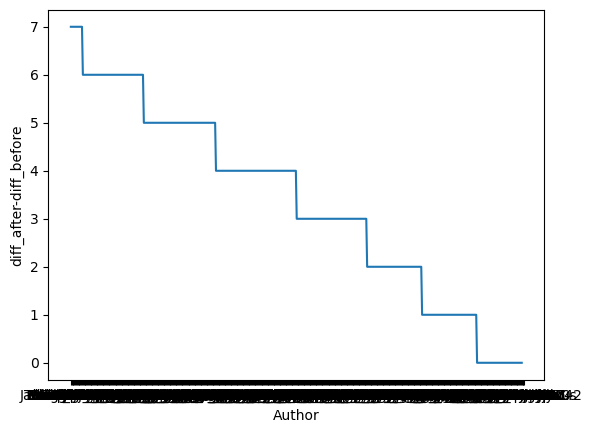

In [58]:
sns.lineplot(before_and_after_author_smt.sort_values("diff_after-diff_before", ascending=False).reset_index(), x="Author", y="diff_after-diff_before")

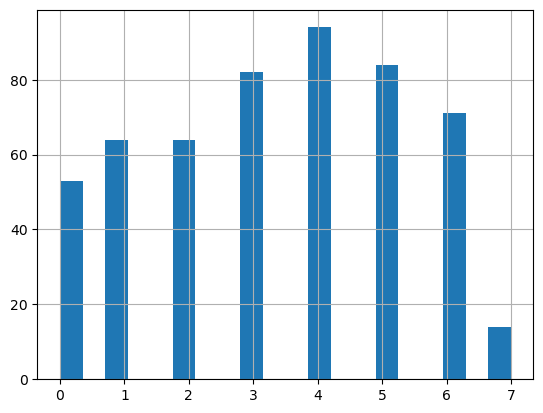

In [59]:
before_and_after_author_smt["diff_after-diff_before"].hist(bins=20)
plt.show()

In [36]:
Y_SMT_SEPARATION_THRESHOLD = 3

In [37]:
before_and_after_author_smt["Y"] = before_and_after_author_smt["diff_after-diff_before"].apply(lambda x: 1 if x > Y_SMT_SEPARATION_THRESHOLD else 0)
before_and_after_author_smt

,0_before,1_before,2_before,0_after,1_after,2_after,diff_before,diff_after,diff_after-diff_before,Y
Author,,,,,,,,,,
0d7aw,11.0,7.0,3.0,7.0,6.0,2.0,4.0,4.0,0.0,0
100Ebay,4.0,17.0,0.0,3.0,12.0,0.0,17.0,12.0,5.0,1
1560gl,1.0,20.0,0.0,1.0,14.0,0.0,20.0,14.0,6.0,1
19Edwin2,5.0,16.0,0.0,2.0,13.0,0.0,16.0,13.0,3.0,0
1Mauricewood,15.0,6.0,0.0,14.0,1.0,0.0,6.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...
xXcvchikXx,2.0,0.0,19.0,1.0,1.0,13.0,19.0,12.0,7.0,1
xalilulah,12.0,9.0,0.0,9.0,6.0,0.0,9.0,6.0,3.0,0
xx_somm,10.0,10.0,1.0,7.0,7.0,1.0,9.0,6.0,3.0,0


In [38]:
before_and_after_author_smt["Y"].value_counts() / before_and_after_author_smt.shape[0]

Y
0    0.502836
1    0.497164
Name: count, dtype: float64

In [60]:
before_and_after_author_smt.to_csv("Y_sentiment_mix_type_diff_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))

In [70]:
before_and_after_author_smt["AuthorBrand"] = before_and_after_author_smt[["Y"]].apply(lambda x: author_to_brand[x.name], axis=1)
before_and_after_author_smt

,0_before,1_before,2_before,0_after,1_after,2_after,diff_before,diff_after,diff_after-diff_before,Y,AuthorBrand
Author,,,,,,,,,,,
0d7aw,11.0,7.0,3.0,7.0,6.0,2.0,4.0,4.0,0.0,0,nike
100Ebay,4.0,17.0,0.0,3.0,12.0,0.0,17.0,12.0,5.0,1,nike
1560gl,1.0,20.0,0.0,1.0,14.0,0.0,20.0,14.0,6.0,1,starbucks
19Edwin2,5.0,16.0,0.0,2.0,13.0,0.0,16.0,13.0,3.0,0,nike
1Mauricewood,15.0,6.0,0.0,14.0,1.0,0.0,6.0,1.0,5.0,1,nike
...,...,...,...,...,...,...,...,...,...,...,...
xXcvchikXx,2.0,0.0,19.0,1.0,1.0,13.0,19.0,12.0,7.0,1,nike
xalilulah,12.0,9.0,0.0,9.0,6.0,0.0,9.0,6.0,3.0,0,nike
xx_somm,10.0,10.0,1.0,7.0,7.0,1.0,9.0,6.0,3.0,0,nike


In [78]:
brand_Y_counts = before_and_after_author_smt[["AuthorBrand", "Y"]].groupby("AuthorBrand").value_counts().reset_index().pivot(index="AuthorBrand", columns="Y", values="count")
brand_Y_counts

Y,0,1
AuthorBrand,,
mcdonalds,11,5
nike,227,247
starbucks,28,11


In [85]:
brand_Y_counts["Brand"] = brand_Y_counts.index.map(lambda x: {"mcdonalds": "McDonalds", "nike": "Nike", "starbucks": "Starbucks"}[x])
brand_Y_counts["Sum01"] = brand_Y_counts[[0,1]].sum(axis=1)
brand_Y_counts["Y=0"] = brand_Y_counts[0] / brand_Y_counts["Sum01"]
brand_Y_counts["Y=1"] = brand_Y_counts[1] / brand_Y_counts["Sum01"]
brand_Y_counts

Y,0,1,Brand,Sum01,Y=0,Y=1
AuthorBrand,,,,,,
mcdonalds,11,5,McDonalds,16,0.687500,0.312500
nike,227,247,Nike,474,0.478903,0.521097
starbucks,28,11,Starbucks,39,0.717949,0.282051


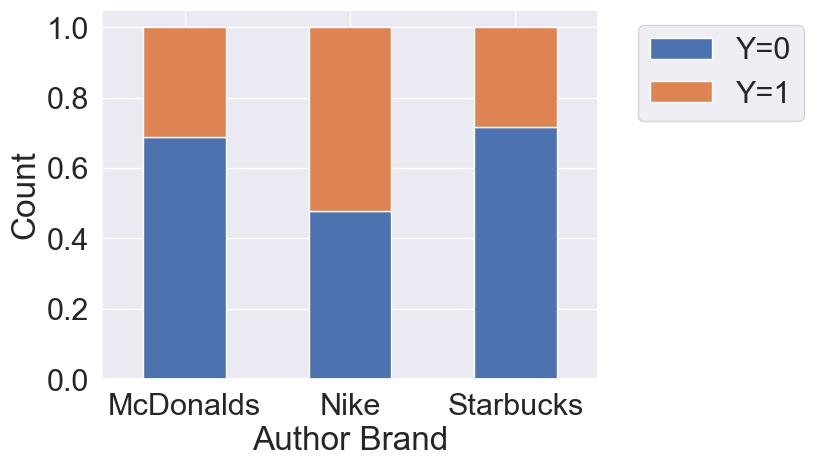

In [86]:
sns.set(font_scale=2)
brand_Y_counts[["Brand","Y=0","Y=1"]].plot(x="Brand", kind='bar', stacked=True)
plt.xlabel("Author Brand")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Mode Sentiment based calculations

In [28]:
author_before = bef_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_before

Sentiment,negative,neutral,positive
Author,,,
0d7aw,0.0,60.0,6.0
100Ebay,0.0,102.0,0.0
1560gl,0.0,39.0,0.0
19Edwin2,0.0,28.0,0.0
1Mauricewood,0.0,58.0,0.0
...,...,...,...
xXcvchikXx,10.0,144.0,80.0
xalilulah,0.0,24.0,0.0
xx_somm,0.0,34.0,1.0


In [29]:
author_after = aft_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_after

Sentiment,negative,neutral,positive
Author,,,
0d7aw,0.0,58.0,5.0
100Ebay,0.0,70.0,0.0
1560gl,0.0,27.0,0.0
19Edwin2,0.0,25.0,0.0
1Mauricewood,0.0,8.0,0.0
...,...,...,...
xXcvchikXx,8.0,108.0,56.0
xalilulah,0.0,15.0,0.0
xx_somm,0.0,29.0,1.0


In [30]:
author_before_after = author_before.join(author_after, how="outer", lsuffix="_before", rsuffix="_after")
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after
Author,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0
...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0


In [31]:
author_before_after["diff_before"] = author_before_after["positive_before"] - author_before_after["negative_before"]
author_before_after["diff_after"] = author_before_after["positive_after"] - author_before_after["negative_after"]
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after
Author,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0


In [32]:
author_before_after["Y"] = author_before_after[["diff_before", "diff_after"]].apply(lambda row: 1 if abs(row["diff_after"] - row["diff_before"]) > 1 else 0, axis=1)
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after,Y
Author,,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0,0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0,0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0,0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0,0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0,1
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0,0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0,0


In [33]:
author_before_after["Y"].value_counts()

0    428
1    101
Name: Y, dtype: int64

In [41]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

0    0.809074
1    0.190926
Name: Y, dtype: float64

In [35]:
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after,Y
Author,,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0,0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0,0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0,0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0,0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0,1
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0,0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0,0


In [36]:
author_before_after.to_csv("Y_data.csv")

In [37]:
(author_before_after["diff_after"] - author_before_after["diff_before"]).value_counts().sort_index()

-51.0       1
-43.0       1
-40.0       1
-37.0       1
-35.0       1
-32.0       1
-30.0       1
-24.0       1
-23.0       1
-22.0       1
-20.0       1
-19.0       2
-18.0       1
-16.0       3
-15.0       2
-14.0       1
-13.0       1
-12.0       2
-11.0       2
-10.0       1
-9.0        2
-8.0        1
-7.0        3
-6.0        4
-5.0        1
-4.0        5
-3.0       10
-2.0       17
-1.0       68
 0.0      327
 1.0       30
 2.0       13
 3.0        5
 5.0        2
 6.0        2
 7.0        2
 9.0        1
 10.0       1
 13.0       1
 14.0       1
 17.0       1
 18.0       1
 23.0       1
 236.0      1
dtype: int64

In [38]:
author_before_after["Y"].value_counts()

0    428
1    101
Name: Y, dtype: int64

In [39]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

0    0.809074
1    0.190926
Name: Y, dtype: float64

In [40]:
# ydf[ydf["Author"] == "yenimeilani76"].iloc[-2].to_dict()

In [41]:
# Drop all tweets by users: "FENRIR___13", "yenimeilani76"
# ydf.drop(ydf[ydf["Author"].isin({"FENRIR___13", "yenimeilani76"})].index, inplace=True)

In [42]:
author_before_after["author_brand"] = author_before_after[["Y"]].apply(lambda x: author_to_brand[x.name], axis=1)
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after,Y,author_brand
Author,,,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0,0,nike
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0,0,nike
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0,0,starbucks
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0,0,nike
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0,0,nike
...,...,...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0,1,nike
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0,0,nike
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0,0,nike


In [86]:
brand_Y_count = author_before_after.reset_index()[["author_brand","Y"]].groupby("author_brand").apply(lambda x: x.value_counts().rename("Count").reset_index()).drop(columns=["author_brand", "Y"]).reset_index().rename(columns={"level_1":"Y"})
brand_Y_count

,author_brand,Y,Count
0,mcdonalds,0,8
1,mcdonalds,1,8
2,nike,0,392
3,nike,1,82
4,starbucks,0,28
5,starbucks,1,11


In [124]:
brand_Y_count_pivot = brand_Y_count.pivot(columns="Y", index="author_brand", values="Count")
brand_Y_count_pivot

Y,0,1
author_brand,,
mcdonalds,8,8
nike,392,82
starbucks,28,11


In [125]:
brand_Y_count_pivot.insert(0, "Brand", ["McDonald","Nike","Starbucks"], True)

In [126]:
brand_Y_count_pivot

Y,Brand,0,1
author_brand,,,
mcdonalds,McDonald,8,8
nike,Nike,392,82
starbucks,Starbucks,28,11


In [130]:
brand_Y_count_pivot_percent =brand_Y_count_pivot
brand_Y_count_pivot_percent["sum"] = brand_Y_count_pivot_percent[[0,1]].sum(axis=1)
brand_Y_count_pivot_percent["Y=0"] = brand_Y_count_pivot_percent.apply(lambda row: row[0]/row["sum"], axis=1)
brand_Y_count_pivot_percent["Y=1"] = brand_Y_count_pivot_percent.apply(lambda row: row[1]/row["sum"], axis=1)
brand_Y_count_pivot_percent

Y,Brand,0,1,sum,0,1,Y=0,Y=1
author_brand,,,,,,,,
mcdonalds,McDonald,8,8,16,0.500000,0.500000,0.500000,0.500000
nike,Nike,392,82,474,0.827004,0.172996,0.827004,0.172996
starbucks,Starbucks,28,11,39,0.717949,0.282051,0.717949,0.282051


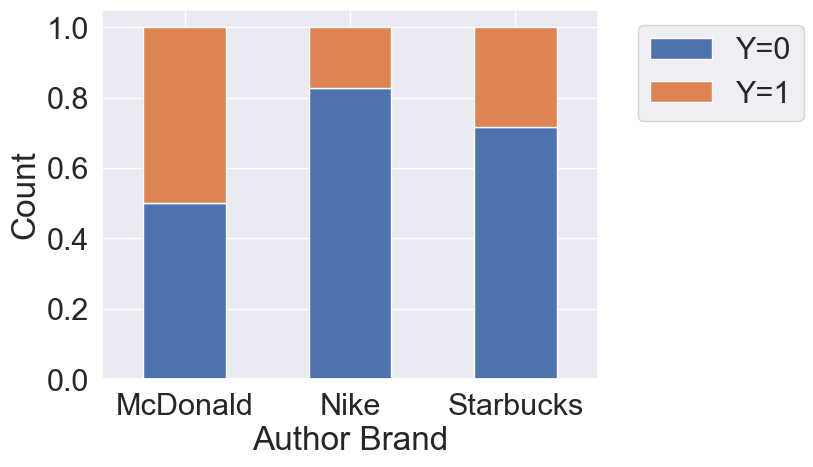

In [132]:
sns.set(font_scale=2)
brand_Y_count_pivot_percent[["Brand","Y=0","Y=1"]].plot(x="Brand", kind='bar', stacked=True)
plt.xlabel("Author Brand")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
sns.set(font_scale=2)
brand_Y_count_pivot.plot(kind='bar', stacked=True)
plt.xlabel("Author Brand")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
author_brand.max_type.value_counts()

nike         487
starbucks     42
mcdonalds     17
Name: max_type, dtype: int64

In [136]:
pie_data= pd.DataFrame(author_brand.max_type.value_counts() / author_brand.shape[0])
pie_data

,max_type
nike,0.891941
starbucks,0.076923
mcdonalds,0.031136


In [137]:
pie_data.insert(0, "Brand", ["Nike","Starbucks","McDonald"], True)

In [138]:
pie_data

,Brand,max_type
nike,Nike,0.891941
starbucks,Starbucks,0.076923
mcdonalds,McDonald,0.031136


In [46]:
author_brand.shape

(546, 5)

In [140]:
pie_data = author_brand.max_type.value_counts()
pie_data

nike         487
starbucks     42
mcdonalds     17
Name: max_type, dtype: int64

In [143]:
pie_data.index

Index(['nike', 'starbucks', 'mcdonalds'], dtype='object')

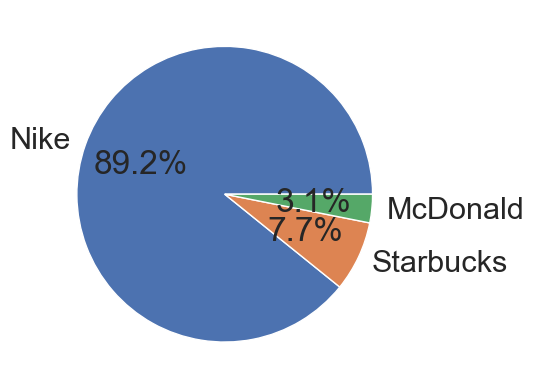

In [147]:
plt.pie(pie_data.values, labels=["Nike", "Starbucks", "McDonald"], autopct='%1.1f%%')
plt.show()

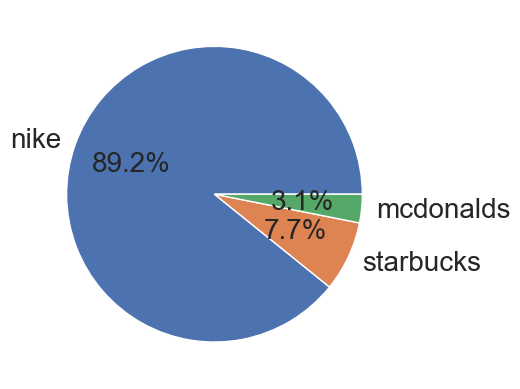

In [135]:
#labels = ["Nike","Starbucks","McDonald"]
author_brand.max_type.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':20})
plt.ylabel(None)
plt.show()

In [48]:
import pandas as pd

In [3]:
transition_names = pd.read_csv("transition_times_negative_neutral_positive@2.csv")

In [8]:
transition_names.Author.unique()

array(['ArtVandelay2021', 'Reuters', 'AJEnglish', 'Orgetorix', 'rk70534',
       'mumaralid', 'prsny2fl', 'LindaSN0228WI', 'O_G_Log',
       'LaCiuraRaffaele', 'naif54243700', 'ReSinanian', 'shehzadyounis',
       'jonathanotcher1', 'filafresh', 'VSNRadio', 'john_medalen',
       'AndyVermaut', 'sallyagale', 'LorettaBower3', 'New_Narrative',
       'xoxnews', 'EpochTimes', 'rashidaldosari', 'realTuckFrumper',
       'BrettDGilman', 'cybereverest', 'business', 'BloombergAsia',
       'am1_news', 'CNN', 'cnni', 'Independent', 'chajeongwoo11',
       'nonneCity', 'AP', 'GEHA714', 'AHRCUSA', 'laurbjn',
       'RealJoeyConfrey', 'bpolitics', 'middleeast', 'jmhamiltonblog',
       'motemotorco', 'konishi_kai', 'ShamimC02', 'NBCNews',
       'dreamcatchermja', 'SerendipitySays', 'MonawwarSyedHA6',
       'MellieMAGA', 'LadyEleanorA', 'omunderdal', 'rsgaddy20',
       'Real_Infinity95', 'saorypon', 'BradPorcellato', 'FranCasso',
       'JulieBryan71197', 'Chris_1791', 'natty4bumpo', '2023James

In [ ]:
not_meaningful = set{'O_G_Log','AndyVermaut','xoxnews',}